In [1]:
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import pyplot
import pandas as pd
import numpy as np
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import layers
from keras.optimizers import Adam



/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-04-05 20:24:33.939780: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-05 20:24:33.989362: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-05 20:24:33.989937: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 20:24:34.729907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find Tensor

In [28]:
# Load the iPhone 12 dataset
df  = pd.read_csv('/home/lix73/tree_based_features_final.csv')

print(df.columns)

df=df[[ 'phone_generation',  'phone_size', 
       'week_of_year', 'month', 'quarter', 'year', 'holiday',
       'days_since_release_date', 'claim', 'black', 'blue', 'coral', 'gold',
       'graphite', 'gray', 'green', 'midnight', 'pink', 'purple', 'red',
       'silver', 'starlight', 'white', 'yellow']]

df

Index(['phone_model', 'phone_generation', 'phone_size', 'phone_color',
       'weeks_monday', 'week_of_year', 'month', 'quarter', 'year', 'holiday',
       'days_since_release_date', 'claim', 'black', 'blue', 'coral', 'gold',
       'graphite', 'gray', 'green', 'midnight', 'pink', 'purple', 'red',
       'silver', 'starlight', 'white', 'yellow', 'apple iphone 11',
       'apple iphone 11 pro', 'apple iphone 11 pro max', 'apple iphone 12',
       'apple iphone 12 mini', 'apple iphone 12 pro',
       'apple iphone 12 pro max', 'apple iphone 13', 'apple iphone 13 mini',
       'apple iphone 13 pro', 'apple iphone 13 pro max', 'apple iphone 14',
       'apple iphone 14 pro max', 'apple iphone 3g s', 'apple iphone 4',
       'apple iphone 4s', 'apple iphone 5', 'apple iphone 5c',
       'apple iphone 5s', 'apple iphone 6', 'apple iphone 6 plus',
       'apple iphone 6s', 'apple iphone 6s plus', 'apple iphone 7',
       'apple iphone 7 plus', 'apple iphone 8', 'apple iphone 8 plus',
       '

,phone_generation,phone_size,week_of_year,month,quarter,year,holiday,days_since_release_date,claim,black,...,gray,green,midnight,pink,purple,red,silver,starlight,white,yellow
0,11,128,27,7,3,2021,0,654,319,1,...,0,0,0,0,0,0,0,0,0,0
1,11,128,28,7,3,2021,0,661,320,1,...,0,0,0,0,0,0,0,0,0,0
2,11,128,29,7,3,2021,0,668,305,1,...,0,0,0,0,0,0,0,0,0,0
3,11,128,30,7,3,2021,0,675,269,1,...,0,0,0,0,0,0,0,0,0,0
4,11,128,31,8,3,2021,0,682,301,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16574,10,64,2,1,1,2023,0,1893,19,0,...,0,0,0,0,0,0,1,0,0,0
16575,10,64,3,1,1,2023,0,1900,18,0,...,0,0,0,0,0,0,1,0,0,0
16576,10,64,4,1,1,2023,0,1907,19,0,...,0,0,0,0,0,0,1,0,0,0
16577,10,64,5,1,1,2023,0,1914,14,0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df13=df[(df['phone_generation']==13)]
df14=df[df['phone_generation']==14]

In [30]:
df13

,phone_generation,phone_size,week_of_year,month,quarter,year,holiday,days_since_release_date,claim,black,...,gray,green,midnight,pink,purple,red,silver,starlight,white,yellow
6124,13,128,48,11,4,2021,0,36,2,0,...,0,0,0,0,0,0,0,0,0,0
6125,13,128,50,12,4,2021,0,50,2,0,...,0,0,0,0,0,0,0,0,0,0
6126,13,128,51,12,4,2021,1,57,1,0,...,0,0,0,0,0,0,0,0,0,0
6127,13,128,52,12,4,2021,0,64,9,0,...,0,0,0,0,0,0,0,0,0,0
6128,13,128,1,1,1,2022,0,71,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7743,13,512,2,1,1,2023,0,442,4,0,...,0,0,0,0,0,0,1,0,0,0
7744,13,512,3,1,1,2023,0,449,1,0,...,0,0,0,0,0,0,1,0,0,0
7745,13,512,4,1,1,2023,0,456,2,0,...,0,0,0,0,0,0,1,0,0,0
7746,13,512,5,1,1,2023,0,463,8,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
train_x= df13.drop('claim', axis=1)
train_y = df13['claim']

test_x= df14.drop('claim', axis=1)
test_y = df14['claim']

In [32]:
import tensorflow as tf
train_x = tf.cast(train_x, dtype='float64')
train_y = tf.cast(train_y, dtype='float64')

test_x = tf.cast(test_x, dtype='float64')
test_y = tf.cast(test_y, dtype='float64')

In [33]:
test_x.shape[0]

63

In [34]:
train_x, train_y = np.array(train_x), np.array(train_y)
print(train_x)
test_x, test_y = np.array(test_x), np.array(test_y)

print(train_x)

train_x = np.reshape(train_x, (train_x.shape[0],1,23))
test_x = np.reshape(test_x,  (test_x.shape[0],1,23))

print(test_x)

[[ 13. 128.  48. ...   0.   0.   0.]
 [ 13. 128.  50. ...   0.   0.   0.]
 [ 13. 128.  51. ...   0.   0.   0.]
 ...
 [ 13. 512.   4. ...   0.   0.   0.]
 [ 13. 512.   5. ...   0.   0.   0.]
 [ 13. 512.   6. ...   0.   0.   0.]]
[[ 13. 128.  48. ...   0.   0.   0.]
 [ 13. 128.  50. ...   0.   0.   0.]
 [ 13. 128.  51. ...   0.   0.   0.]
 ...
 [ 13. 512.   4. ...   0.   0.   0.]
 [ 13. 512.   5. ...   0.   0.   0.]
 [ 13. 512.   6. ...   0.   0.   0.]]
[[[ 14. 128.  46. ...   0.   0.   0.]]

 [[ 14. 128.  47. ...   0.   0.   0.]]

 [[ 14. 128.  48. ...   0.   0.   0.]]

 ...

 [[ 14. 128.   6. ...   0.   0.   0.]]

 [[ 14. 128.   6. ...   0.   0.   0.]]

 [[ 14. 128.   6. ...   0.   0.   0.]]]


In [35]:
# 创建模型
model = Sequential()
# RNN神经网络
# 隐藏层100
model.add(layers.SimpleRNN(units=100, return_sequences=True))
model.add(Activation('relu'))
# Dropout层用于防止过拟合
model.add(Dropout(0.1))
# 隐藏层100
model.add(layers.SimpleRNN(units=100))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

In [36]:
model.compile(loss='mean_squared_error', optimizer=Adam())

# 训练模型
history = model.fit(train_x, train_y, epochs=30, batch_size=64,
                    validation_data=(test_x, test_y), verbose=2)
model.summary() 


Epoch 1/30
26/26 - 1s - loss: 11123.8525 - val_loss: 267.3029 - 1s/epoch - 44ms/step
Epoch 2/30
26/26 - 0s - loss: 10572.1699 - val_loss: 240.6331 - 53ms/epoch - 2ms/step
Epoch 3/30
26/26 - 0s - loss: 10292.9688 - val_loss: 231.3159 - 52ms/epoch - 2ms/step
Epoch 4/30
26/26 - 0s - loss: 10094.8350 - val_loss: 228.2820 - 53ms/epoch - 2ms/step
Epoch 5/30
26/26 - 0s - loss: 9920.8184 - val_loss: 229.4190 - 53ms/epoch - 2ms/step
Epoch 6/30
26/26 - 0s - loss: 9763.8145 - val_loss: 234.1053 - 53ms/epoch - 2ms/step
Epoch 7/30
26/26 - 0s - loss: 9606.2227 - val_loss: 242.2193 - 57ms/epoch - 2ms/step
Epoch 8/30
26/26 - 0s - loss: 9456.2900 - val_loss: 253.2408 - 53ms/epoch - 2ms/step
Epoch 9/30
26/26 - 0s - loss: 9316.8193 - val_loss: 268.2637 - 54ms/epoch - 2ms/step
Epoch 10/30
26/26 - 0s - loss: 9168.6338 - val_loss: 286.2769 - 53ms/epoch - 2ms/step
Epoch 11/30
26/26 - 0s - loss: 9043.7803 - val_loss: 307.0353 - 53ms/epoch - 2ms/step
Epoch 12/30
26/26 - 0s - loss: 8918.5361 - val_loss: 330.538

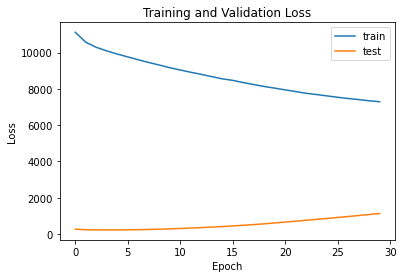

In [37]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
plt.title('Training and Validation Loss')
pyplot.legend()
pyplot.show()

In [38]:
test_x

array([[[ 14., 128.,  46., ...,   0.,   0.,   0.]],

       [[ 14., 128.,  47., ...,   0.,   0.,   0.]],

       [[ 14., 128.,  48., ...,   0.,   0.,   0.]],

       ...,

       [[ 14., 128.,   6., ...,   0.,   0.,   0.]],

       [[ 14., 128.,   6., ...,   0.,   0.,   0.]],

       [[ 14., 128.,   6., ...,   0.,   0.,   0.]]])

In [39]:
yhat = model.predict(test_x)

2/2 [==============================] - 0s 2ms/step


In [40]:
def wmape(actual, forecast):
    # we take two series and calculate an output a wmape from it, not to be used in a grouping function

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y,yhat)
print('MSE:', mse)

wmape=wmape(test_y,yhat)
print("WMAPE: {:.2%}".format(wmape))

MSE: 1132.8452662887596
WMAPE: 17140.56%


In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [42]:
train_x.shape

(1624, 1, 23)

In [43]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_x.shape[1], 23)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 24))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(train_x, train_y, epochs = 100, batch_size = 32)

2023-04-05 20:27:24.242205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 20:27:24.243342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 20:27:24.244249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-04-05 20:27:24.874233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 20:27:24.875504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 20:27:24.876510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

51/51 [==============================] - 5s 3ms/step - loss: 11489.1094
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 10964.1045
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 10465.4102
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 10140.7725
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 9873.1973
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 9621.2090
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 9400.3750
Epoch 8/100
51/51 [==============================] - 0s 3ms/step - loss: 9198.2861
Epoch 9/100
51/51 [==============================] - 0s 3ms/step - loss: 8989.4375
Epoch 10/100
51/51 [==============================] - 0s 3ms/step - loss: 8814.2363
Epoch 11/100
51/51 [==============================] - 0s 3ms/step - loss: 8639.2383
Epoch 12/100
51/51 [==============================] - 0s 3ms/step - loss: 8474.5557
Epoch 13/

51/51 [==============================] - 0s 3ms/step - loss: 6383.5879
Epoch 99/100
51/51 [==============================] - 0s 3ms/step - loss: 6355.2808
Epoch 100/100
51/51 [==============================] - 0s 3ms/step - loss: 6324.3774


In [44]:
test_x.shape

(63, 1, 23)

In [45]:
predicted_claim = regressor.predict(test_x)


2023-04-05 20:27:46.847699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-05 20:27:46.848930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-05 20:27:46.849904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 1s 3ms/step


In [46]:
predicted_claim.shape

(63, 24)

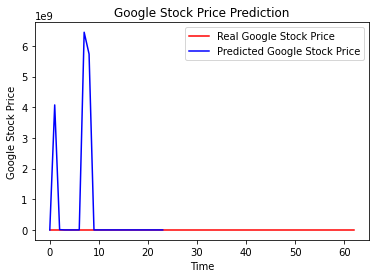

In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df13)

predicted_claim = sc.inverse_transform(predicted_claim)

plt.plot(test_y, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_claim[1], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

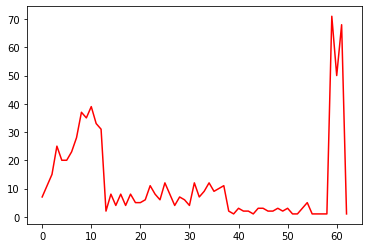

In [48]:
plt.plot(test_y, color = 'red', label = 'Real Google Stock Price')

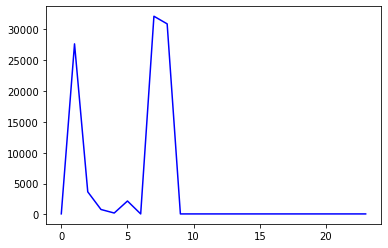

In [50]:
plt.plot(predicted_claim[2], color = 'blue', label = 'Predicted Google Stock Price')